In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

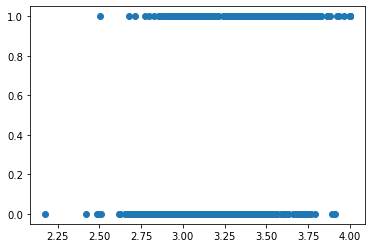

In [2]:
admissions = pd.read_csv("admissions.csv")
#in admit, either it is admitted 1 or not 0
plt.scatter(admissions['gpa'],admissions['admit'])
plt.show()

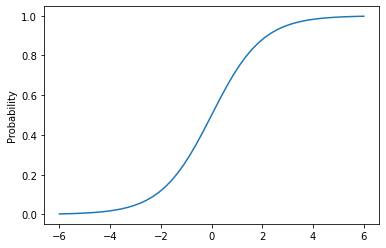

In [3]:
# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

In [4]:
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

probabilities = model.predict_proba(admissions[["gpa"]])
# Probability that the row belongs to label `0`.
print(probabilities[:5,0])

# Probabililty that the row belongs to label `1`.
print(probabilities[:5,1])


#It is easy to verify that position-wise, the probabilities add to 1

[0.66343633 0.53967962 0.84160275 0.70338133 0.68063462]
[0.33656367 0.46032038 0.15839725 0.29661867 0.31936538]


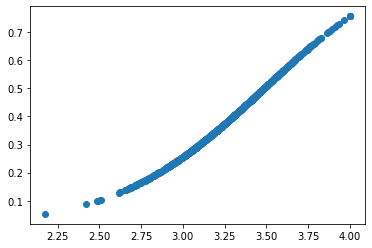

In [5]:
#By plotting the gpa score against admission, we can see almost the same shape
x = admissions[["gpa"]]
y  = probabilities[:,1]

plt.scatter(x, y)
plt.show()

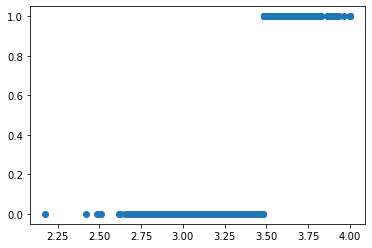

In [6]:
labels = model.predict(admissions[['gpa']])
plt.scatter(admissions["gpa"],labels)


In [7]:
admissions["Labels"] = labels
print(admissions["Labels"].value_counts())
print(admissions.head())

0    507
1    137
Name: Labels, dtype: int64
   admit       gpa         gre  Labels
0      0  3.177277  594.102992       0
1      0  3.412655  631.528607       0
2      0  2.728097  553.714399       0
3      0  3.093559  551.089985       0
4      0  3.141923  537.184894       0


In [8]:
matches = admissions["Labels"] == admissions["admit"]
correct_predictions = admissions[matches]
print(correct_predictions.head())
true_values = len(correct_predictions)
print("The number of correct predictions is: {}".format(true_values))
accuracy =  true_values/ len(admissions)
print("\n")
print("The probability of accuracy is: {}".format(accuracy))

   admit       gpa         gre  Labels
0      0  3.177277  594.102992       0
1      0  3.412655  631.528607       0
2      0  2.728097  553.714399       0
3      0  3.093559  551.089985       0
4      0  3.141923  537.184894       0
The number of correct predictions is: 441


The probability of accuracy is: 0.6847826086956522


In [9]:
true_positive_filter = (admissions['Labels'] == 1) & (admissions['admit'] == 1)

true_negative_filter = (admissions['Labels'] == 0) & (admissions['admit'] == 0)

true_positives = len(admissions[true_positive_filter])

true_negatives = len(admissions[true_negative_filter])

print("The number of true positive predictions is: {}".format(true_positives))
print("The number of true negative predictions is: {}".format(true_negatives))

The number of true positive predictions is: 89
The number of true negative predictions is: 352


In [11]:
#How to calculate sensitivity, the portion of true positive predictions with respect of the total number of admitted 
true_positive_filter = (admissions['Labels'] == 1) & (admissions['admit'] == 1)

false_negative_filter = (admissions['Labels'] == 0) & (admissions['admit'] == 1)

true_positives = len(admissions[true_positive_filter])

false_negatives = len(admissions[false_negative_filter])

Admitted_values_filter = (admissions['admit'] == 1)

Admitted_values = len(admissions[Admitted_values_filter])

sensitivity = true_positives/Admitted_values

print(sensitivity)


0.36475409836065575


In [12]:
#How to calculate specificity, the portion of true negative predictions with respect of the total number of not admitted 
true_negative_filter = (admissions['Labels'] == 0) & (admissions['admit'] == 0)

false_positive_filter = (admissions['Labels'] == 1) & (admissions['admit'] == 0)

true_negatives = len(admissions[true_negative_filter])

false_positives = len(admissions[false_positive_filter])

Not_admitted_values_filter = (admissions['admit'] == 0)

Not_admitted_values = len(admissions[Not_admitted_values_filter])

specificity = true_negatives/Not_admitted_values

print(specificity)

0.88
